#### 라이브러리 불러오기

In [117]:
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

##### 한글 설정

In [118]:
import matplotlib.font_manager as fm
import platform

os_name = platform.system()

# font_path는 사용할 폰트에 따라 변경하면 됨
font_path = 'c:/Windows/Fonts/malgun.ttf' if os_name=='Windows' \
    else '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_family = fm.FontProperties(fname=font_path).get_name()

# font 설정
plt.rcParams['font.family'] = font_family

In [119]:
# 폰트캐시까지 삭제 후 한글폰트가 사용될 수 있도록 캐시 삭제
# --> 이렇게 해야 비로소 한글이 표현되는 경우가 많음
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [font_family]

#### 원본데이터를 이용한 모델링

##### 원본데이터 불러오기

In [120]:
DATA_PATH = os.path.join(os.getcwd(), 'data')
data_df = pd.read_csv(os.path.join(DATA_PATH, 'train.csv'))

In [121]:
data_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### 데이터 (간단) 전처리

* 결측치 처리

In [122]:
# 나이는 전체 중앙값으로 변환
data_df['Age'].fillna(data_df['Age'].median(), inplace=True)

# 승선항은 최빈값(mode()중 첫번째)으로 변환
data_df['Embarked'].fillna(data_df['Embarked'].mode()[0], inplace=True)

* 문자열 컬럼 숫자로 변환

In [123]:
data_df.Sex = data_df.Sex.map({'male':0, 'female': 1})
data_df.Embarked = data_df.Embarked.map({
    'S': 0, 'C': 1, 'Q': 2
})

##### 훈련/학습용 데이터 분리

In [124]:
SEED = 123

In [125]:
# 필요한 특성과 타겟 변수 선택
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

data_x = data_df[features]
data_y = data_df[target]

train_x, test_x, train_y, test_y = \
    train_test_split(data_x, data_y, test_size=0.2, random_state=SEED)

##### 모델 훈련

In [126]:
model = RandomForestClassifier(random_state=SEED)
model.fit(train_x, train_y)

RandomForestClassifier(random_state=123)

##### 정확도 확인

In [127]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f'RandomForestClassifier Accuracy: {accuracy:.5f}')

RandomForestClassifier Accuracy: 0.83240


##### 속성별 중요도 확인

In [128]:
feature_importances = model.feature_importances_
feature_importances

array([0.08142946, 0.25373927, 0.26775239, 0.05103363, 0.03678334,
       0.27685305, 0.03240885])

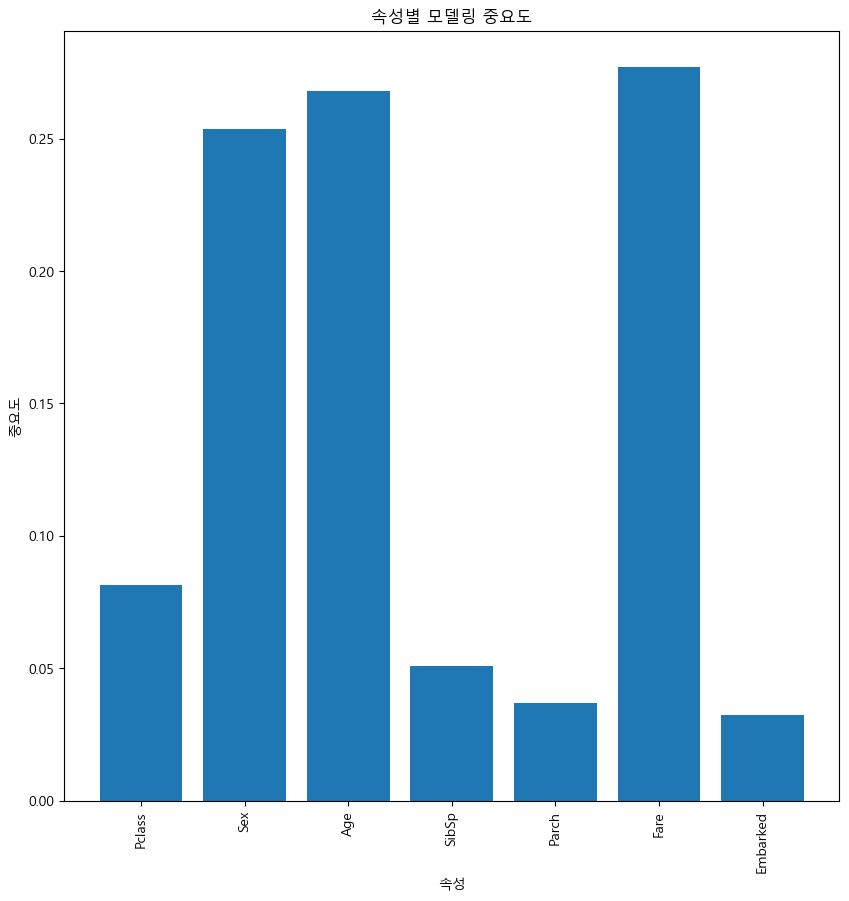

In [129]:
plt.bar(train_x.columns, feature_importances)
plt.xticks(rotation=90)
plt.xlabel('속성')
plt.ylabel('중요도')
plt.title('속성별 모델링 중요도')
plt.show()

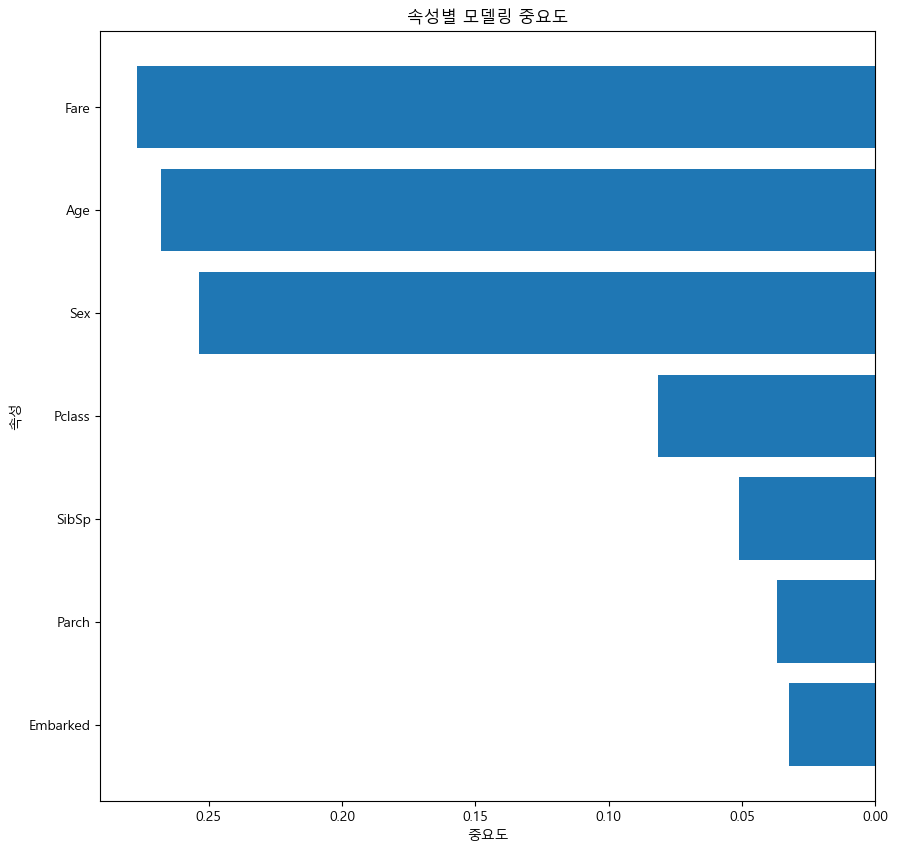

In [130]:
# 중요도 오름차순 정렬(아래 이미지를 그릴때 역순으로 그림)
sorted_idx = feature_importances.argsort()
# 특성 이름을 순서대로 정렬
sorted_features = [train_x.columns[i] for i in sorted_idx]

# 세로 이미지
plt.barh(sorted_features, feature_importances[sorted_idx])
plt.ylabel('속성')
plt.xlabel('중요도')
plt.title('속성별 모델링 중요도')

# x,y축 뒤집기
plt.gca().invert_xaxis()
plt.show()

In [131]:
import numpy as np
# 샘플 ndarray 생성
data = np.array([3, 1, 4, 1, 5, 9, 2, 6])

# 내림차순으로 정렬된 인덱스 얻기
sorted_idx_desc = np.argsort(data)[::-1]

# 내림차순으로 정렬된 ndarray 생성
sorted_data_desc = data[sorted_idx_desc]

print('원래 데이터:', data)
print('내림차순 정렬된 데이터:', sorted_data_desc)

원래 데이터: [3 1 4 1 5 9 2 6]
내림차순 정렬된 데이터: [9 6 5 4 3 2 1 1]


#### 전처리된 데이터를 이용한 모델링

##### 전처리 데이터 불러오기

In [132]:
data_df = pd.read_csv(os.path.join(DATA_PATH, 'preprocessing_data.csv'))
label_df = pd.read_csv(os.path.join(DATA_PATH, 'preprocessing_label.csv'))

##### 훈련/시험용 데이터 분리

In [133]:
train_x, test_x, train_y, test_y = \
    train_test_split(data_df, label_df, test_size=0.2, random_state=SEED)

##### 모델 훈련

In [134]:
model = RandomForestClassifier(random_state=SEED)
model.fit(train_x, train_y.values.ravel())

RandomForestClassifier(random_state=123)

##### 정확도 확인

In [135]:
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f'RandomForestClassifier Accuracy: {accuracy:.5f}')

RandomForestClassifier Accuracy: 0.88268


##### 속성별 중요도 확인

In [136]:
feature_importances = model.feature_importances_
feature_importances

array([3.82660171e-02, 2.09420493e-02, 1.20892784e-01, 1.24780106e-01,
       2.91161646e-04, 3.42072500e-03, 6.06522589e-04, 1.68609846e-02,
       2.71207599e-03, 4.48998677e-03, 3.21714317e-03, 4.89772960e-03,
       1.08561588e-03, 4.49779183e-02, 3.42715291e-03, 8.39086819e-04,
       2.35432495e-05, 1.61448731e-02, 1.24065635e-02, 3.05772737e-02,
       6.76127799e-02, 8.30639672e-02, 9.57631780e-03, 9.32937387e-05,
       6.87605932e-03, 1.38698504e-02, 3.17278969e-04, 5.65034506e-04,
       0.00000000e+00, 4.89894163e-04, 1.11974353e-03, 0.00000000e+00,
       3.77687261e-05, 8.23492700e-04, 7.93953915e-03, 2.48826397e-02,
       1.04323363e-04, 6.27354889e-05, 8.94135195e-02, 2.10011647e-02,
       2.25070875e-04, 1.95180541e-03, 0.00000000e+00, 8.51628071e-03,
       8.13815434e-03, 5.25480372e-03, 1.61619729e-01, 3.55854394e-02])

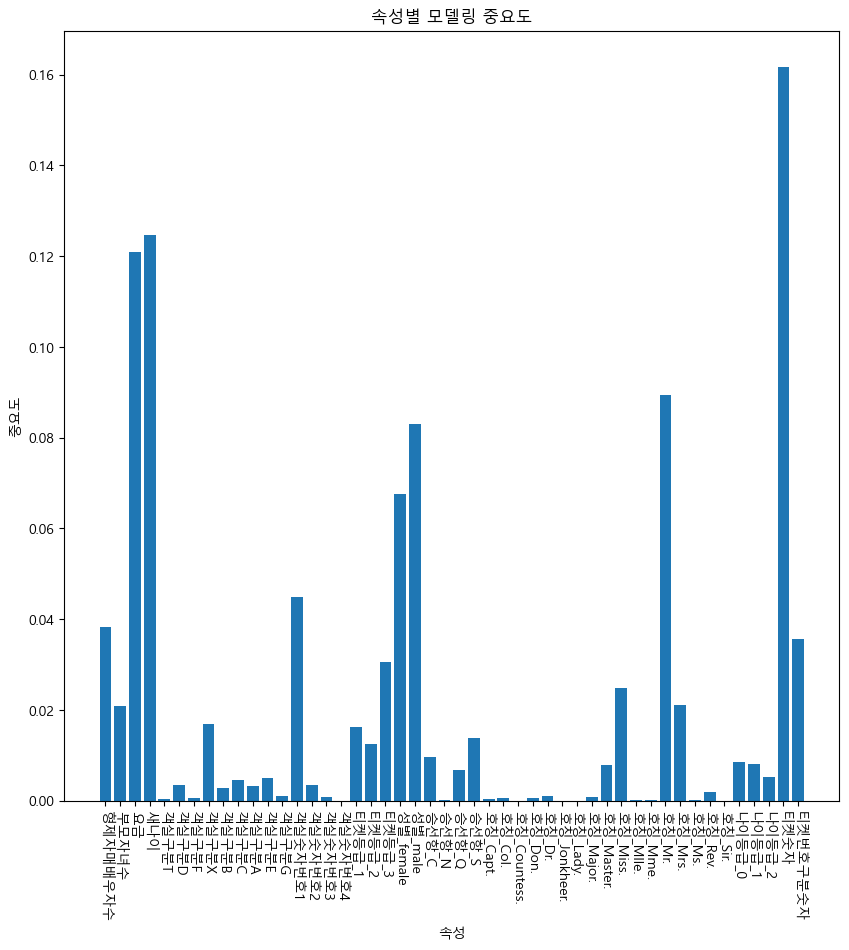

In [137]:
plt.bar(train_x.columns, feature_importances)
plt.xticks(rotation=270)
plt.xlabel('속성')
plt.ylabel('중요도')
plt.title('속성별 모델링 중요도')
plt.show()

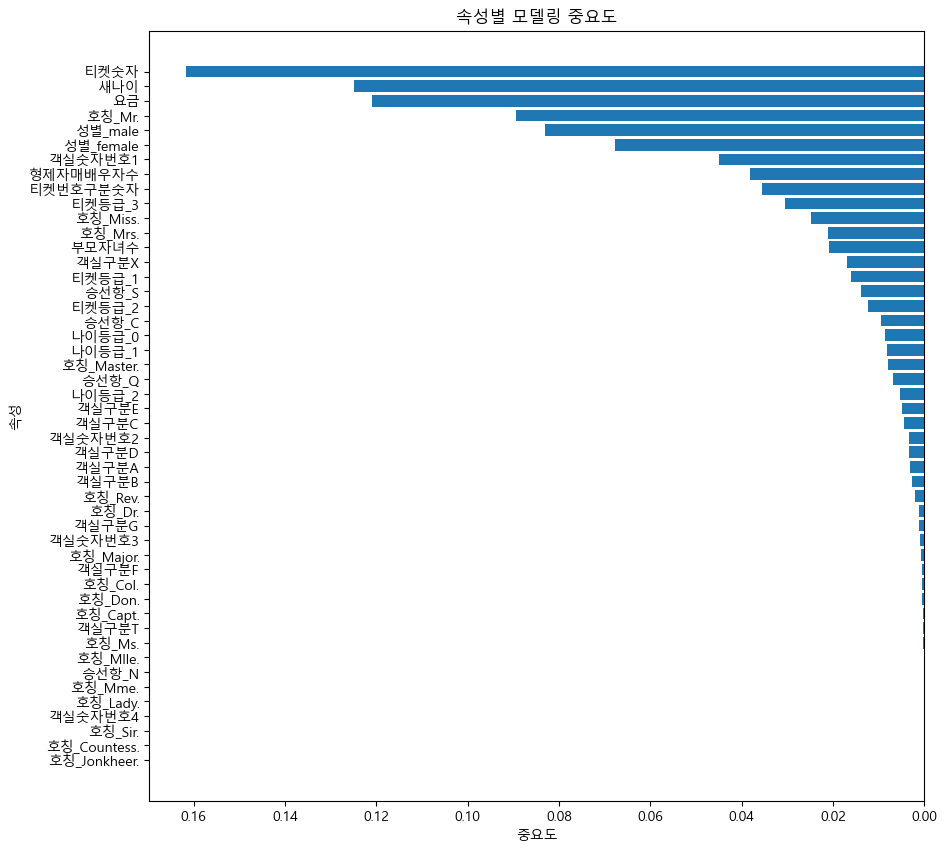

In [138]:
# 중요도 오름차순 정렬(아래 이미지를 그릴때 역순으로 그림)
sorted_idx = feature_importances.argsort()

# 특성 이름을 순서대로 정렬
sorted_features = [train_x.columns[i] for i in sorted_idx]

# 세로 이미지
plt.barh(sorted_features, feature_importances[sorted_idx])
plt.ylabel('속성')
plt.xlabel('중요도')
plt.title('속성별 모델링 중요도')

# x,y축 뒤집기
plt.gca().invert_xaxis()
plt.show()